**Природничі процеси (Популяційний ріст)**

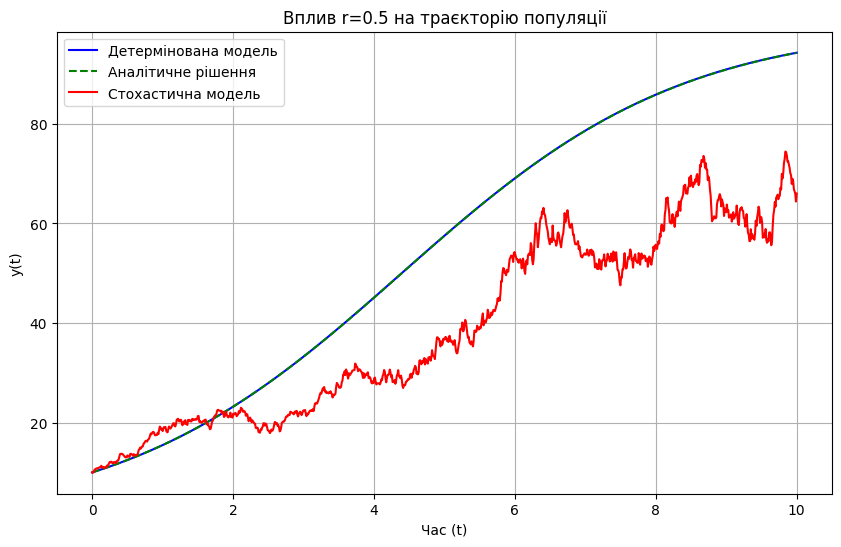

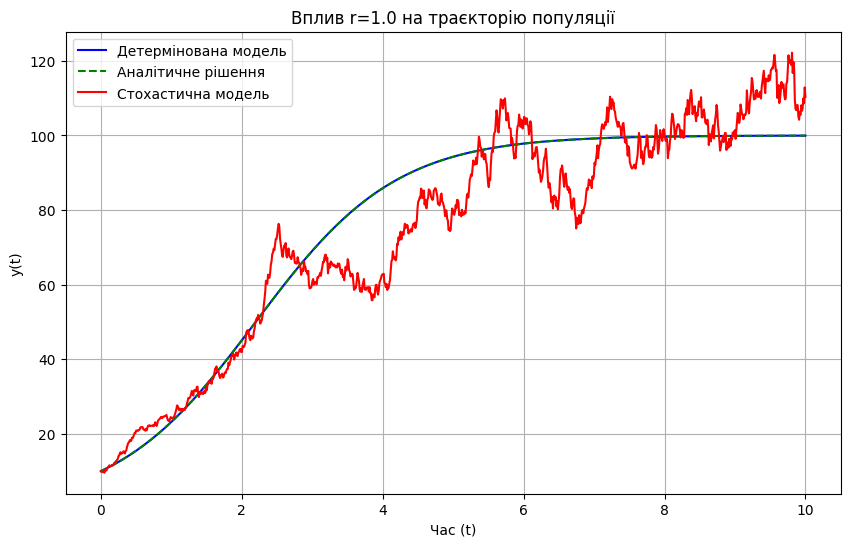

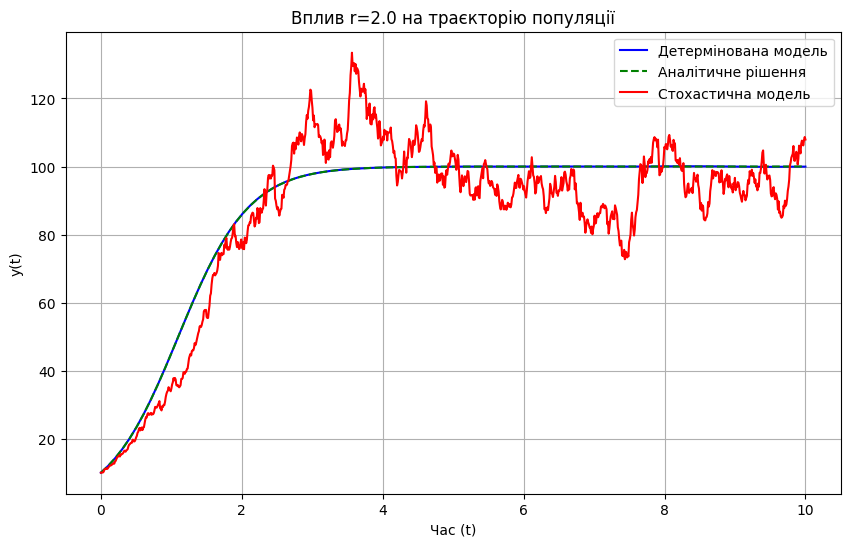

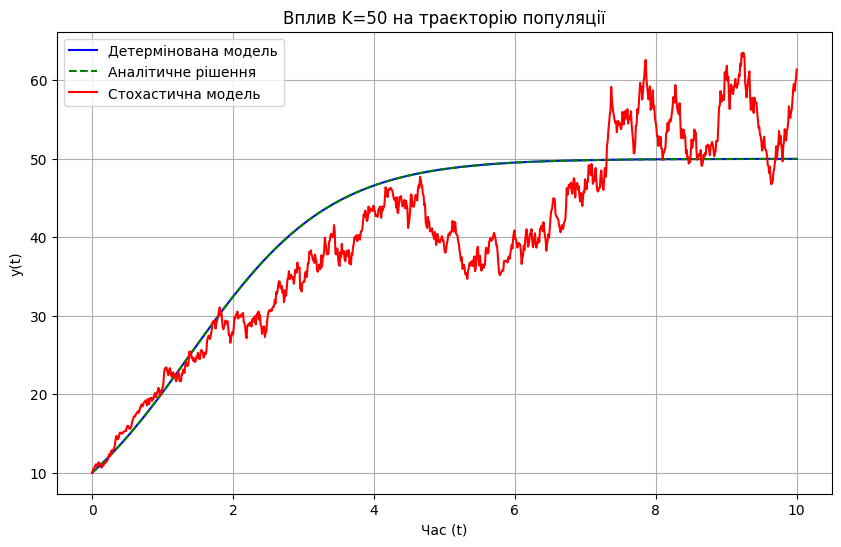

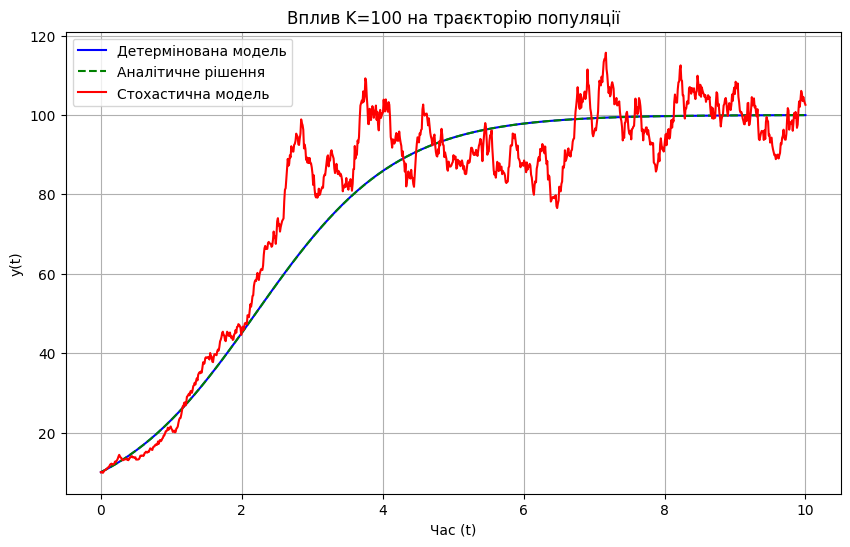

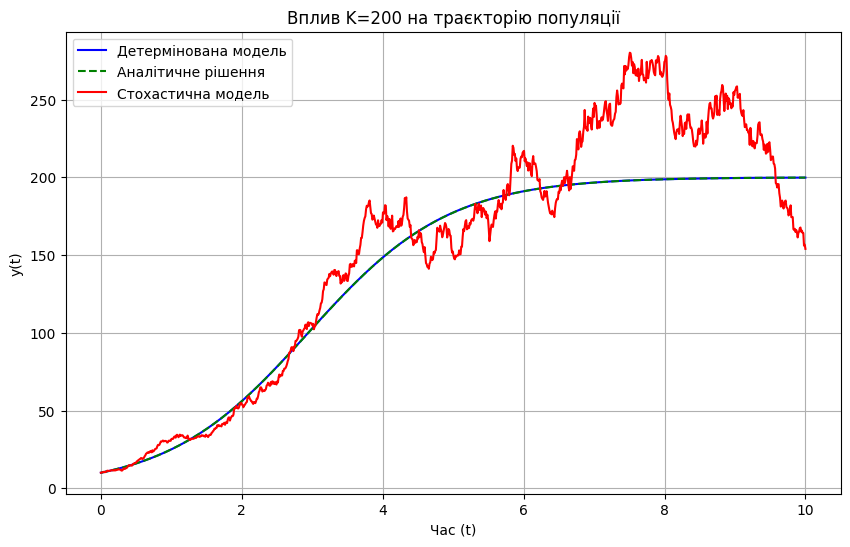

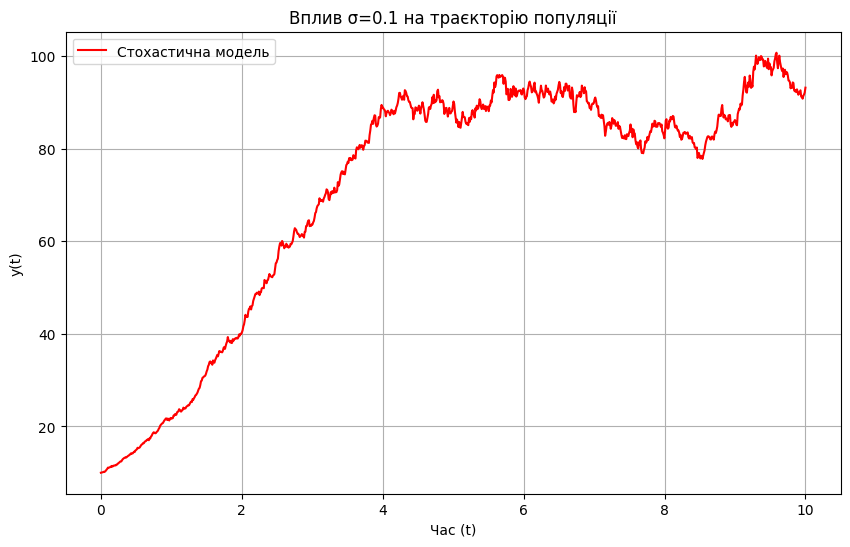

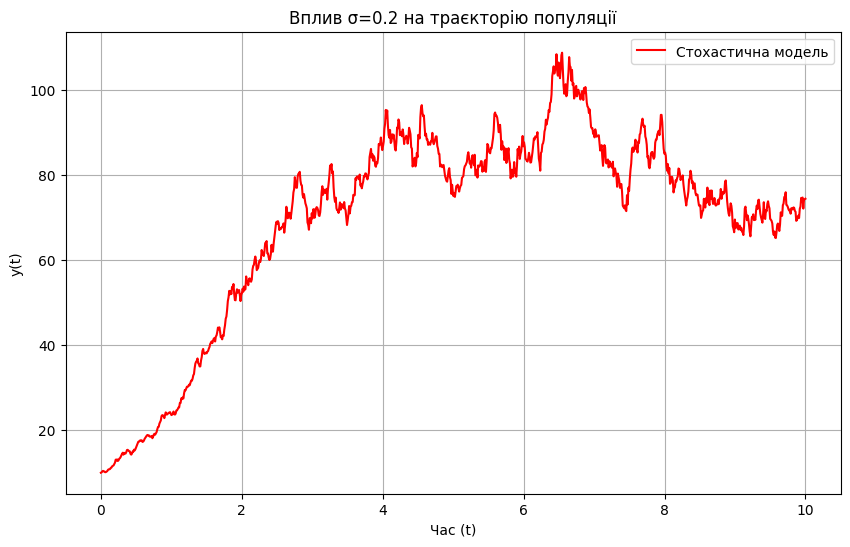

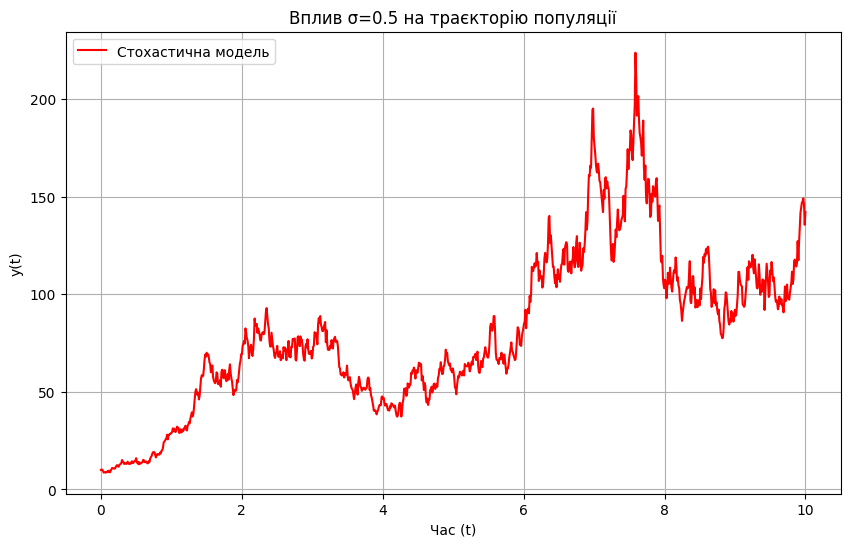

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі
r_values = [0.5, 1.0, 2.0]  # Різні значення швидкості росту
K_values = [50, 100, 200]  # Різні місткості середовища
sigma_values = [0.1, 0.2, 0.5]  # Різні рівні шуму

y0 = 10.0  # Початкове значення популяції
t_span = (0, 10)  # Інтервал часу
n_steps = 1000  # Кількість кроків у стохастичній моделі
T = t_span[1]
dt = T / n_steps
t_eval = np.linspace(t_span[0], T, 100)
t_stoch = np.linspace(t_span[0], T, n_steps)

# Детермінована логістична модель
def logistic_model(t, y, r, K):
    return r * y * (1 - y / K)

# Стохастична логістична модель (Euler–Maruyama)
def stochastic_logistic(r, K, sigma):
    y_stoch = np.zeros(n_steps)
    y_stoch[0] = y0
    for i in range(1, n_steps):
        dW = np.random.normal(0, np.sqrt(dt))  # Приріст Вінерівського процесу
        y_stoch[i] = y_stoch[i-1] + r * y_stoch[i-1] * (1 - y_stoch[i-1] / K) * dt + sigma * y_stoch[i-1] * dW
    return y_stoch

# Аналіз параметра r
for r in r_values:
    solution = solve_ivp(logistic_model, t_span, [y0], t_eval=t_eval, args=(r, 100))
    y_det = solution.y[0]
    analytical_solution = 100 / (1 + ((100 - y0) / y0) * np.exp(-r * t_eval))
    y_stoch = stochastic_logistic(r, 100, 0.2)

    plt.figure(figsize=(10,6))
    plt.plot(t_eval, y_det, 'b-', label="Детермінована модель")
    plt.plot(t_eval, analytical_solution, 'g--', label="Аналітичне рішення")
    plt.plot(t_stoch, y_stoch, 'r-', label="Стохастична модель")
    plt.xlabel("Час (t)")
    plt.ylabel("y(t)")
    plt.title(f"Вплив r={r} на траєкторію популяції")
    plt.legend()
    plt.grid(True)
    plt.show()

# Аналіз параметра K
for K in K_values:
    solution = solve_ivp(logistic_model, t_span, [y0], t_eval=t_eval, args=(1.0, K))
    y_det = solution.y[0]
    analytical_solution = K / (1 + ((K - y0) / y0) * np.exp(-1.0 * t_eval))
    y_stoch = stochastic_logistic(1.0, K, 0.2)

    plt.figure(figsize=(10,6))
    plt.plot(t_eval, y_det, 'b-', label="Детермінована модель")
    plt.plot(t_eval, analytical_solution, 'g--', label="Аналітичне рішення")
    plt.plot(t_stoch, y_stoch, 'r-', label="Стохастична модель")
    plt.xlabel("Час (t)")
    plt.ylabel("y(t)")
    plt.title(f"Вплив K={K} на траєкторію популяції")
    plt.legend()
    plt.grid(True)
    plt.show()

# Аналіз параметра sigma
for sigma in sigma_values:
    y_stoch = stochastic_logistic(1.0, 100, sigma)

    plt.figure(figsize=(10,6))
    plt.plot(t_stoch, y_stoch, 'r-', label="Стохастична модель")
    plt.xlabel("Час (t)")
    plt.ylabel("y(t)")
    plt.title(f"Вплив σ={sigma} на траєкторію популяції")
    plt.legend()
    plt.grid(True)
    plt.show()

**Економічні процеси (Модель економічного замовлення, EOQ)**

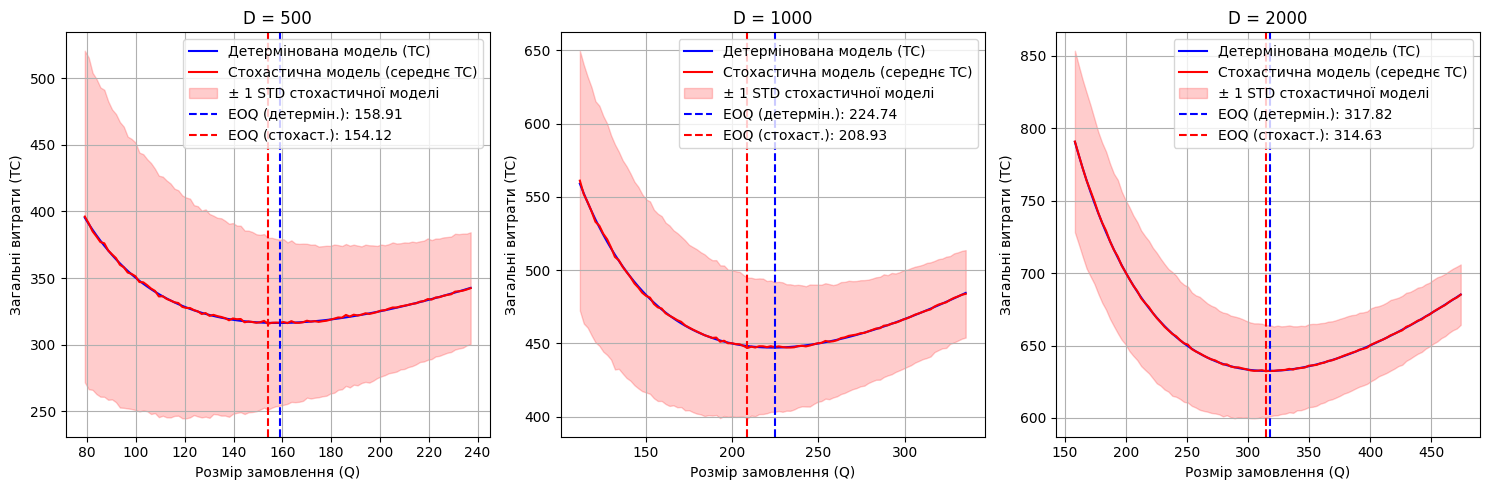

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Фіксовані параметри моделі EOQ
S = 50.0  # Вартість оформлення одного замовлення
H = 2.0  # Вартість зберігання одиниці товару за рік
sigma_D = 200.0  # Стандартне відхилення попиту
n_sim = 10000  # Кількість симуляцій

# Різні значення середнього попиту D для аналізу
D_values = [500, 1000, 2000]

# Функції для обчислення EOQ і загальних витрат
def compute_eoq(D, S, H):
    return math.sqrt((2 * D * S) / H)

def total_cost(Q, D, S, H):
    return (D / Q) * S + (Q / 2) * H

# Побудова графіків для різних D
plt.figure(figsize=(15, 5))

for i, D in enumerate(D_values):
    Q_values = np.linspace(compute_eoq(D, S, H) * 0.5, compute_eoq(D, S, H) * 1.5, 100)
    TC_deterministic = np.array([total_cost(Q, D, S, H) for Q in Q_values])

    TC_stochastic_mean = []
    TC_stochastic_std = []

    for Q in Q_values:
        D_samples = np.maximum(np.random.normal(D, sigma_D, n_sim), 0)
        TC_samples = (D_samples / Q) * S + (Q / 2) * H
        TC_stochastic_mean.append(np.mean(TC_samples))
        TC_stochastic_std.append(np.std(TC_samples))

    TC_stochastic_mean = np.array(TC_stochastic_mean)
    TC_stochastic_std = np.array(TC_stochastic_std)

    # Знаходимо оптимальні Q
    optimal_idx_det = int(np.argmin(TC_deterministic))
    optimal_idx_stoch = int(np.argmin(TC_stochastic_mean))
    Q_optimal_det = Q_values[optimal_idx_det]
    Q_optimal_stoch = Q_values[optimal_idx_stoch]

    # Побудова підграфіка
    plt.subplot(1, 3, i+1)
    plt.plot(Q_values, TC_deterministic, 'b-', label="Детермінована модель (TC)")
    plt.plot(Q_values, TC_stochastic_mean, 'r-', label="Стохастична модель (середнє TC)")
    plt.fill_between(
        Q_values,
        TC_stochastic_mean - TC_stochastic_std,
        TC_stochastic_mean + TC_stochastic_std,
        color='r', alpha=0.2, label="± 1 STD стохастичної моделі")
    plt.axvline(Q_optimal_det, color='b', linestyle='--', label=f"EOQ (детермін.): {Q_optimal_det:.2f}")
    plt.axvline(Q_optimal_stoch, color='r', linestyle='--', label=f"EOQ (стохаст.): {Q_optimal_stoch:.2f}")
    plt.xlabel("Розмір замовлення (Q)")
    plt.ylabel("Загальні витрати (TC)")
    plt.title(f"D = {D}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


**Соціальні процеси (Модель соціальної динаміки)**

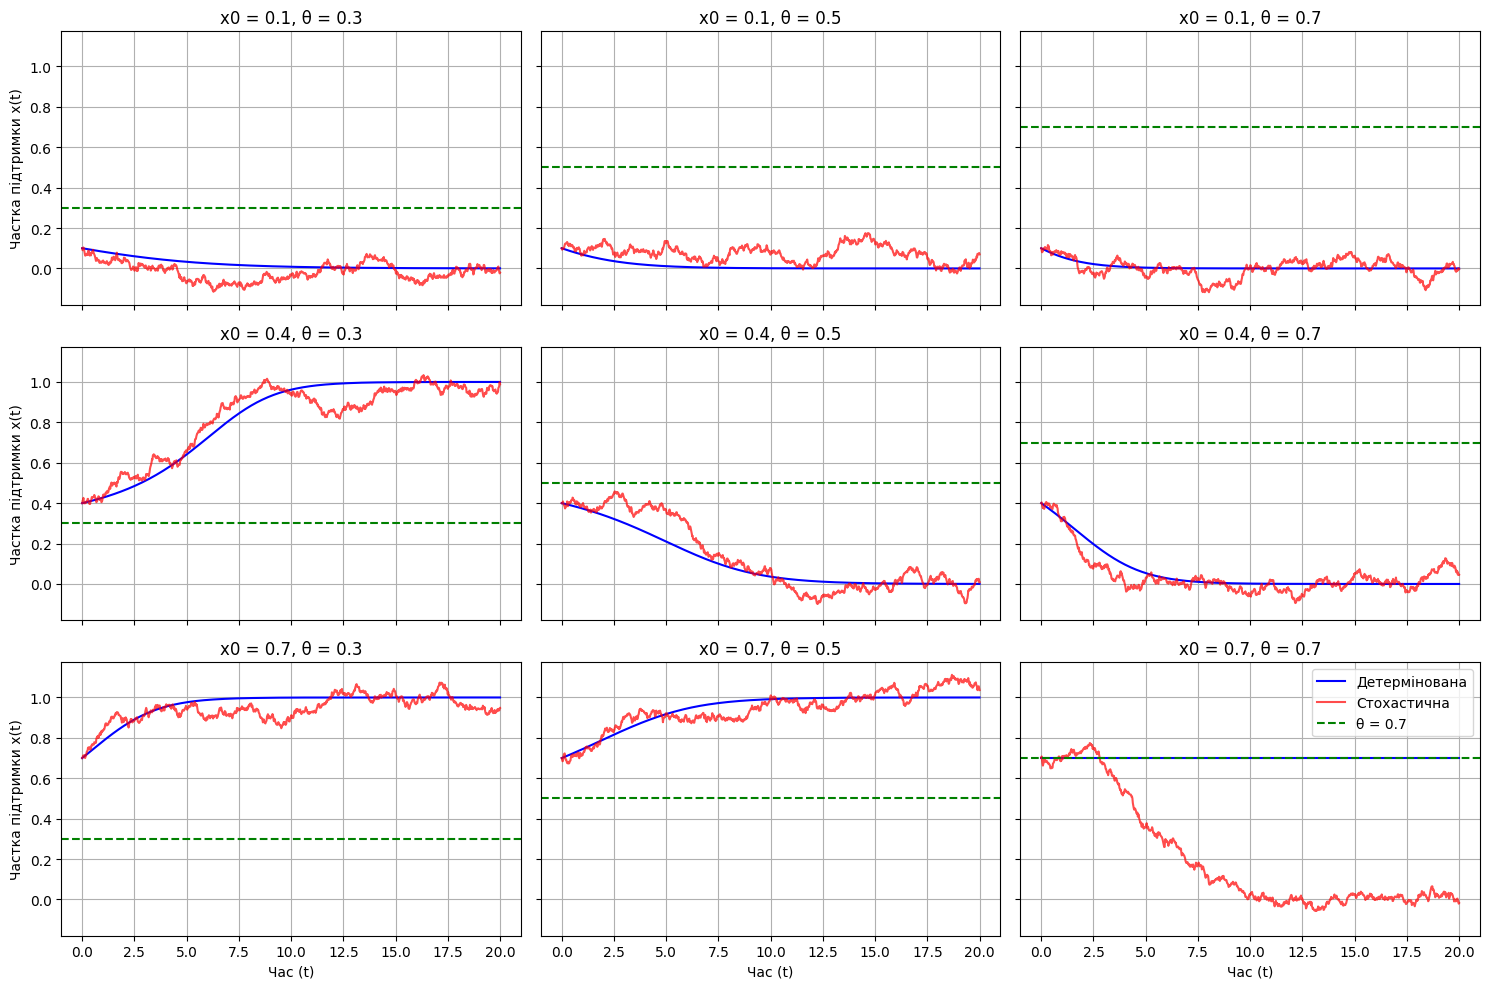

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметри моделі
k: float = 1.0  # Коефіцієнт швидкості динаміки
x0_values = [0.1, 0.4, 0.7]  # Різні початкові значення x0
theta_values = [0.3, 0.5, 0.7]  # Різні критичні пороги theta

t_span: tuple[float, float] = (0, 20)  # Проміжок часу
t_eval: np.ndarray = np.linspace(t_span[0], t_span[1], 300)  # Часовий вектор

# Функція для диференціального рівняння
def social_dynamics(t: float, x: np.ndarray, theta: float) -> np.ndarray:
    return np.array([k * x[0] * (1 - x[0]) * (x[0] - theta)])

# Стохастична модель (Euler–Maruyama)
def stochastic_dynamics(x0, theta, sigma_noise=0.05, n_steps=1000, T=20):
    dt = T / n_steps
    t_stoch = np.linspace(0, T, n_steps)
    x_stoch = np.zeros(n_steps)
    x_stoch[0] = x0

    for i in range(1, n_steps):
        dW = np.random.normal(0, np.sqrt(dt))
        f = k * x_stoch[i-1] * (1 - x_stoch[i-1]) * (x_stoch[i-1] - theta)
        x_stoch[i] = x_stoch[i-1] + f * dt + sigma_noise * dW

    return t_stoch, x_stoch

# Побудова графіків
fig, axes = plt.subplots(len(x0_values), len(theta_values), figsize=(15, 10), sharex=True, sharey=True)

for i, x0 in enumerate(x0_values):
    for j, theta in enumerate(theta_values):
        solution_det = solve_ivp(social_dynamics, t_span, [x0], t_eval=t_eval, args=(theta,))
        t_stoch, x_stoch = stochastic_dynamics(x0, theta)

        ax = axes[i, j]
        ax.plot(t_eval, solution_det.y[0], 'b-', label="Детермінована")
        ax.plot(t_stoch, x_stoch, 'r-', alpha=0.7, label="Стохастична")
        ax.axhline(y=theta, color='g', linestyle='--', label=f"θ = {theta}")
        ax.set_title(f"x0 = {x0}, θ = {theta}")
        ax.grid(True)
        if i == len(x0_values) - 1:
            ax.set_xlabel("Час (t)")
        if j == 0:
            ax.set_ylabel("Частка підтримки x(t)")

plt.legend()
plt.tight_layout()
plt.show()


**Завдання 2**

[*********************100%***********************]  3 of 3 completed


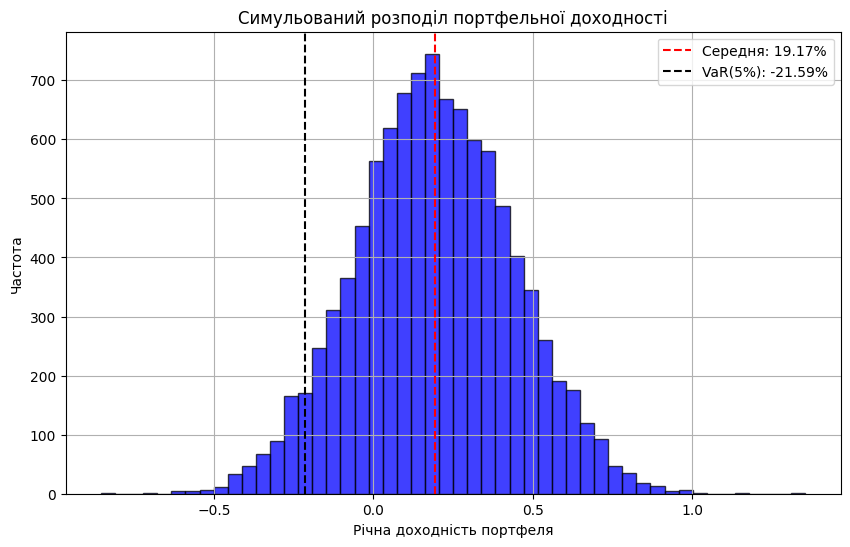

Очікувана річна доходність портфеля: 19.17%
Ризик портфеля (стандартне відхилення): 24.68%
Value-at-Risk (5%): -21.59%
Рекомендація: зменшити частку волатильних активів (наприклад, TSLA).


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

#Збір та обробка даних1
assets: list[str] = ["TSLA", "GOOG", "GM"]

data = yf.download(assets, start="2018-01-01", end="2023-01-01", auto_adjust=False)["Close"]

# Розрахунок щоденних та річних доходностей
returns = data.pct_change().dropna()
annual_returns = returns.mean() * 252  # Річна доходність
annual_volatility = returns.std() * np.sqrt(252)  # Річна волатильність

# Задання ваг портфеля
weights: np.ndarray = np.array([0.4, 0.4, 0.2])  # сума ваг 1

#Симуляція портфельної доходності2
n_simulations = 10000  # Кількість симуляцій
simulated_returns = np.random.normal(
    loc=annual_returns, scale=annual_volatility, size=(n_simulations, len(assets))
)

# Розрахунок портфельної доходності для кожної симуляції за формулою
portfolio_returns = np.dot(simulated_returns, weights)

# Очікувана доходність, ризик та Value-at-Risk (VaR 5%)
expected_return = np.mean(portfolio_returns)
portfolio_risk = np.std(portfolio_returns)
var_5 = np.percentile(portfolio_returns, 5)  # VaR на рівні 5%

#Візуалізація та аналіз3
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.75, color="blue", edgecolor="black")
plt.axvline(expected_return, color="red", linestyle="--", label=f"Середня: {expected_return:.2%}")
plt.axvline(var_5, color="black", linestyle="--", label=f"VaR(5%): {var_5:.2%}")
plt.xlabel("Річна доходність портфеля")
plt.ylabel("Частота")
plt.title("Симульований розподіл портфельної доходності")
plt.legend()
plt.grid()
plt.show()

#Висновки
print(f"Очікувана річна доходність портфеля: {expected_return:.2%}")
print(f"Ризик портфеля (стандартне відхилення): {portfolio_risk:.2%}")
print(f"Value-at-Risk (5%): {var_5:.2%}")

# Рекомендації щодо ребалансування
if var_5 < -0.05:  # Якщо VaR вказує на великий потенційний збиток
    print("Рекомендація: зменшити частку волатильних активів.")
if expected_return < 0.05:  # Якщо очікувана дохідність низька
    print("Рекомендація: додати нові активи з вищою очікуваною дохідністю.")


Висока очікувана дохідність (19.17%) свідчить про те, що портфель потенційно прибутковий. Ризик портфеля (24.68%) є досить високим, що може означати значні коливання вартості активів. Value-at-Risk (−21.59%) вказує на те, що у найгірших сценаріях можливий збиток понад 21% річної доходності.
Це свідчить про високу ризикованість портфеля.

Рекомендації щодо ребалансування: Зменшити частку волатильних активів (наприклад, TSLA) та перерозподілити ваги між менш ризикованими активами. Наприклад, можна збільшити частку GOOG або GM, які можуть бути менш волатильними.
Додати активи з низькою кореляцією з поточними (наприклад, облігації, золото). Це може знизити загальний ризик портфеля без значного зменшення дохідності.
